In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
# Load data
df = pd.read_csv('cleared_train.csv')
train = pd.read_csv('cleared_test.csv')

# Data preprocessing
exclude_columns = ['Количество позиций', 'Unnamed: 0']
train = train.drop(columns=exclude_columns)

X = df.drop(columns=exclude_columns + ['y'])
y = df['y']

In [5]:
train.columns

Index(['Поставщик', 'Материал', 'Категорийный менеджер',
       'Операционный менеджер', 'Завод', 'Закупочная организация',
       'Группа закупок', 'Балансовая единица', 'ЕИ', 'Группа материалов',
       'Вариант поставки', 'НРП', 'Длительность', 'Месяц1', 'Месяц2',
       'День недели 2', 'Сумма', 'Количество', 'Количество обработчиков 7',
       'Согласование заказа 1', 'Согласование заказа 2',
       'Согласование заказа 3', 'Изменение даты поставки 7',
       'Количество изменений после согласований', 'Дней между 0_1',
       'Дней между 1_2', 'Дней между 2_3', 'Дней между 3_4', 'Дней между 5_6',
       'Дней между 6_7', 'Дней между 7_8'],
      dtype='object')

In [6]:
X.columns

Index(['Поставщик', 'Материал', 'Категорийный менеджер',
       'Операционный менеджер', 'Завод', 'Закупочная организация',
       'Группа закупок', 'Балансовая единица', 'ЕИ', 'Группа материалов',
       'Вариант поставки', 'НРП', 'Длительность', 'Месяц1', 'Месяц2',
       'День недели 2', 'Сумма', 'Количество', 'Количество обработчиков 7',
       'Согласование заказа 1', 'Согласование заказа 2',
       'Согласование заказа 3', 'Изменение даты поставки 7',
       'Количество изменений после согласований', 'Дней между 0_1',
       'Дней между 1_2', 'Дней между 2_3', 'Дней между 3_4', 'Дней между 5_6',
       'Дней между 6_7', 'Дней между 7_8'],
      dtype='object')

In [6]:
sm = SMOTE(random_state=42, k_neighbors=5)
X, y = sm.fit_resample(X, y)

In [7]:
X.shape

(385326, 31)

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

In [10]:
X_new = SelectKBest(chi2, k=30).fit_transform(X, y)
X_new.shape

(385326, 30)

In [11]:
from sklearn.feature_selection import RFECV

xgb = XGBClassifier()

rfecv = RFECV(estimator=xgb, step=1, cv=5, scoring='f1_macro')

In [12]:
rfecv = rfecv.fit(X, y)

In [13]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 30


In [14]:
# transform the training data

X_train_rfecv = rfecv.transform(X)

# train classifier

xgb.fit(X_train_rfecv, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [15]:
test_data = pd.read_csv('cleared_test.csv')
X_test = test_data
X_test = X_test[X.columns]

In [19]:
X_test

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,...,Согласование заказа 3,Изменение даты поставки 7,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 5_6,Дней между 6_7,Дней между 7_8
0,273,269,6,8,1,1,64,1,9,22,...,1,0.0,16,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0
1,499,27439,1,10,18,16,1,14,1,35,...,0,0.0,12,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0
2,86,27439,2,2,1,1,172,1,1,26,...,1,3.0,12,3.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
3,97,4064,2,4,7,1,22,6,3,46,...,1,2.0,16,7.0,0.0,0.0,0.0,-1.0,-1.0,1.0
4,117,27439,2,3,1,1,2,1,1,2,...,1,1.0,15,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,255,6409,3,6,3,1,10,3,1,16,...,2,0.0,18,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
24996,1,5827,1,1,7,1,46,6,1,13,...,2,4.0,0,1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
24997,8,6504,6,5,3,1,17,3,1,21,...,1,0.0,9,2.0,0.0,0.0,0.0,-1.0,-1.0,-1.0
24998,18,1309,7,17,1,1,44,1,1,142,...,3,0.0,31,8.0,0.0,0.0,1.0,-1.0,-1.0,-1.0


In [20]:
X

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Группа закупок,Балансовая единица,ЕИ,Группа материалов,...,Согласование заказа 3,Изменение даты поставки 7,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 5_6,Дней между 6_7,Дней между 7_8
0,606,7448,4,5,1,1,9,1,1,150,...,1,1.000000,11,82.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
1,7,27439,1,1,21,15,255,12,3,12,...,0,0.000000,11,12.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
2,318,27213,1,20,11,12,4,1,1,11,...,1,0.000000,12,27.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
3,1768,19949,5,2,1,1,55,1,1,34,...,1,1.000000,14,2.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
4,7,27439,1,1,12,9,8,1,3,12,...,0,0.000000,7,1.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385321,405,27439,1,1,13,13,39,11,1,6,...,0,0.000000,9,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
385322,424,27,1,11,5,4,224,4,5,49,...,1,0.000000,12,10.568767,0.0,2.542239,0.0,0.0,0.0,0.000000
385323,647,5240,1,1,18,15,301,13,1,19,...,0,0.000000,8,0.797140,0.0,0.000000,0.0,0.0,0.0,0.000000
385324,1537,27439,1,1,17,17,50,16,1,1,...,0,0.000000,11,38.000000,0.0,0.000000,0.0,0.0,0.0,0.000000


In [21]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = xgb.predict(X_test_rfecv)

In [22]:
y_pred_rfecv

array([0, 0, 0, ..., 0, 0, 0])

In [23]:
submission_df = pd.DataFrame({'id': range(len(y_pred_rfecv)), 'value': y_pred_rfecv})
submission_df.to_csv('submission.csv', index=False)

In [8]:
from sklearn.ensemble import RandomForestClassifier
clf = XGBClassifier(n_estimators=200, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
X2 = StandardScaler().fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [12]:
# predict on the test set
y_pred = clf.predict(X_test)

In [13]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

НРП                                        0.310890
Изменение даты поставки 7                  0.080107
Дней между 2_3                             0.067808
Дней между 3_4                             0.056489
Дней между 0_1                             0.052811
Согласование заказа 3                      0.038960
Согласование заказа 2                      0.038441
Количество                                 0.035072
Дней между 1_2                             0.029267
Операционный менеджер                      0.021587
Количество обработчиков 7                  0.021223
Согласование заказа 1                      0.020817
Количество изменений после согласований    0.019057
Длительность                               0.018750
Месяц2                                     0.017258
Балансовая единица                         0.017040
Завод                                      0.015857
ЕИ                                         0.015847
Месяц1                                     0.014215
Закупочная о

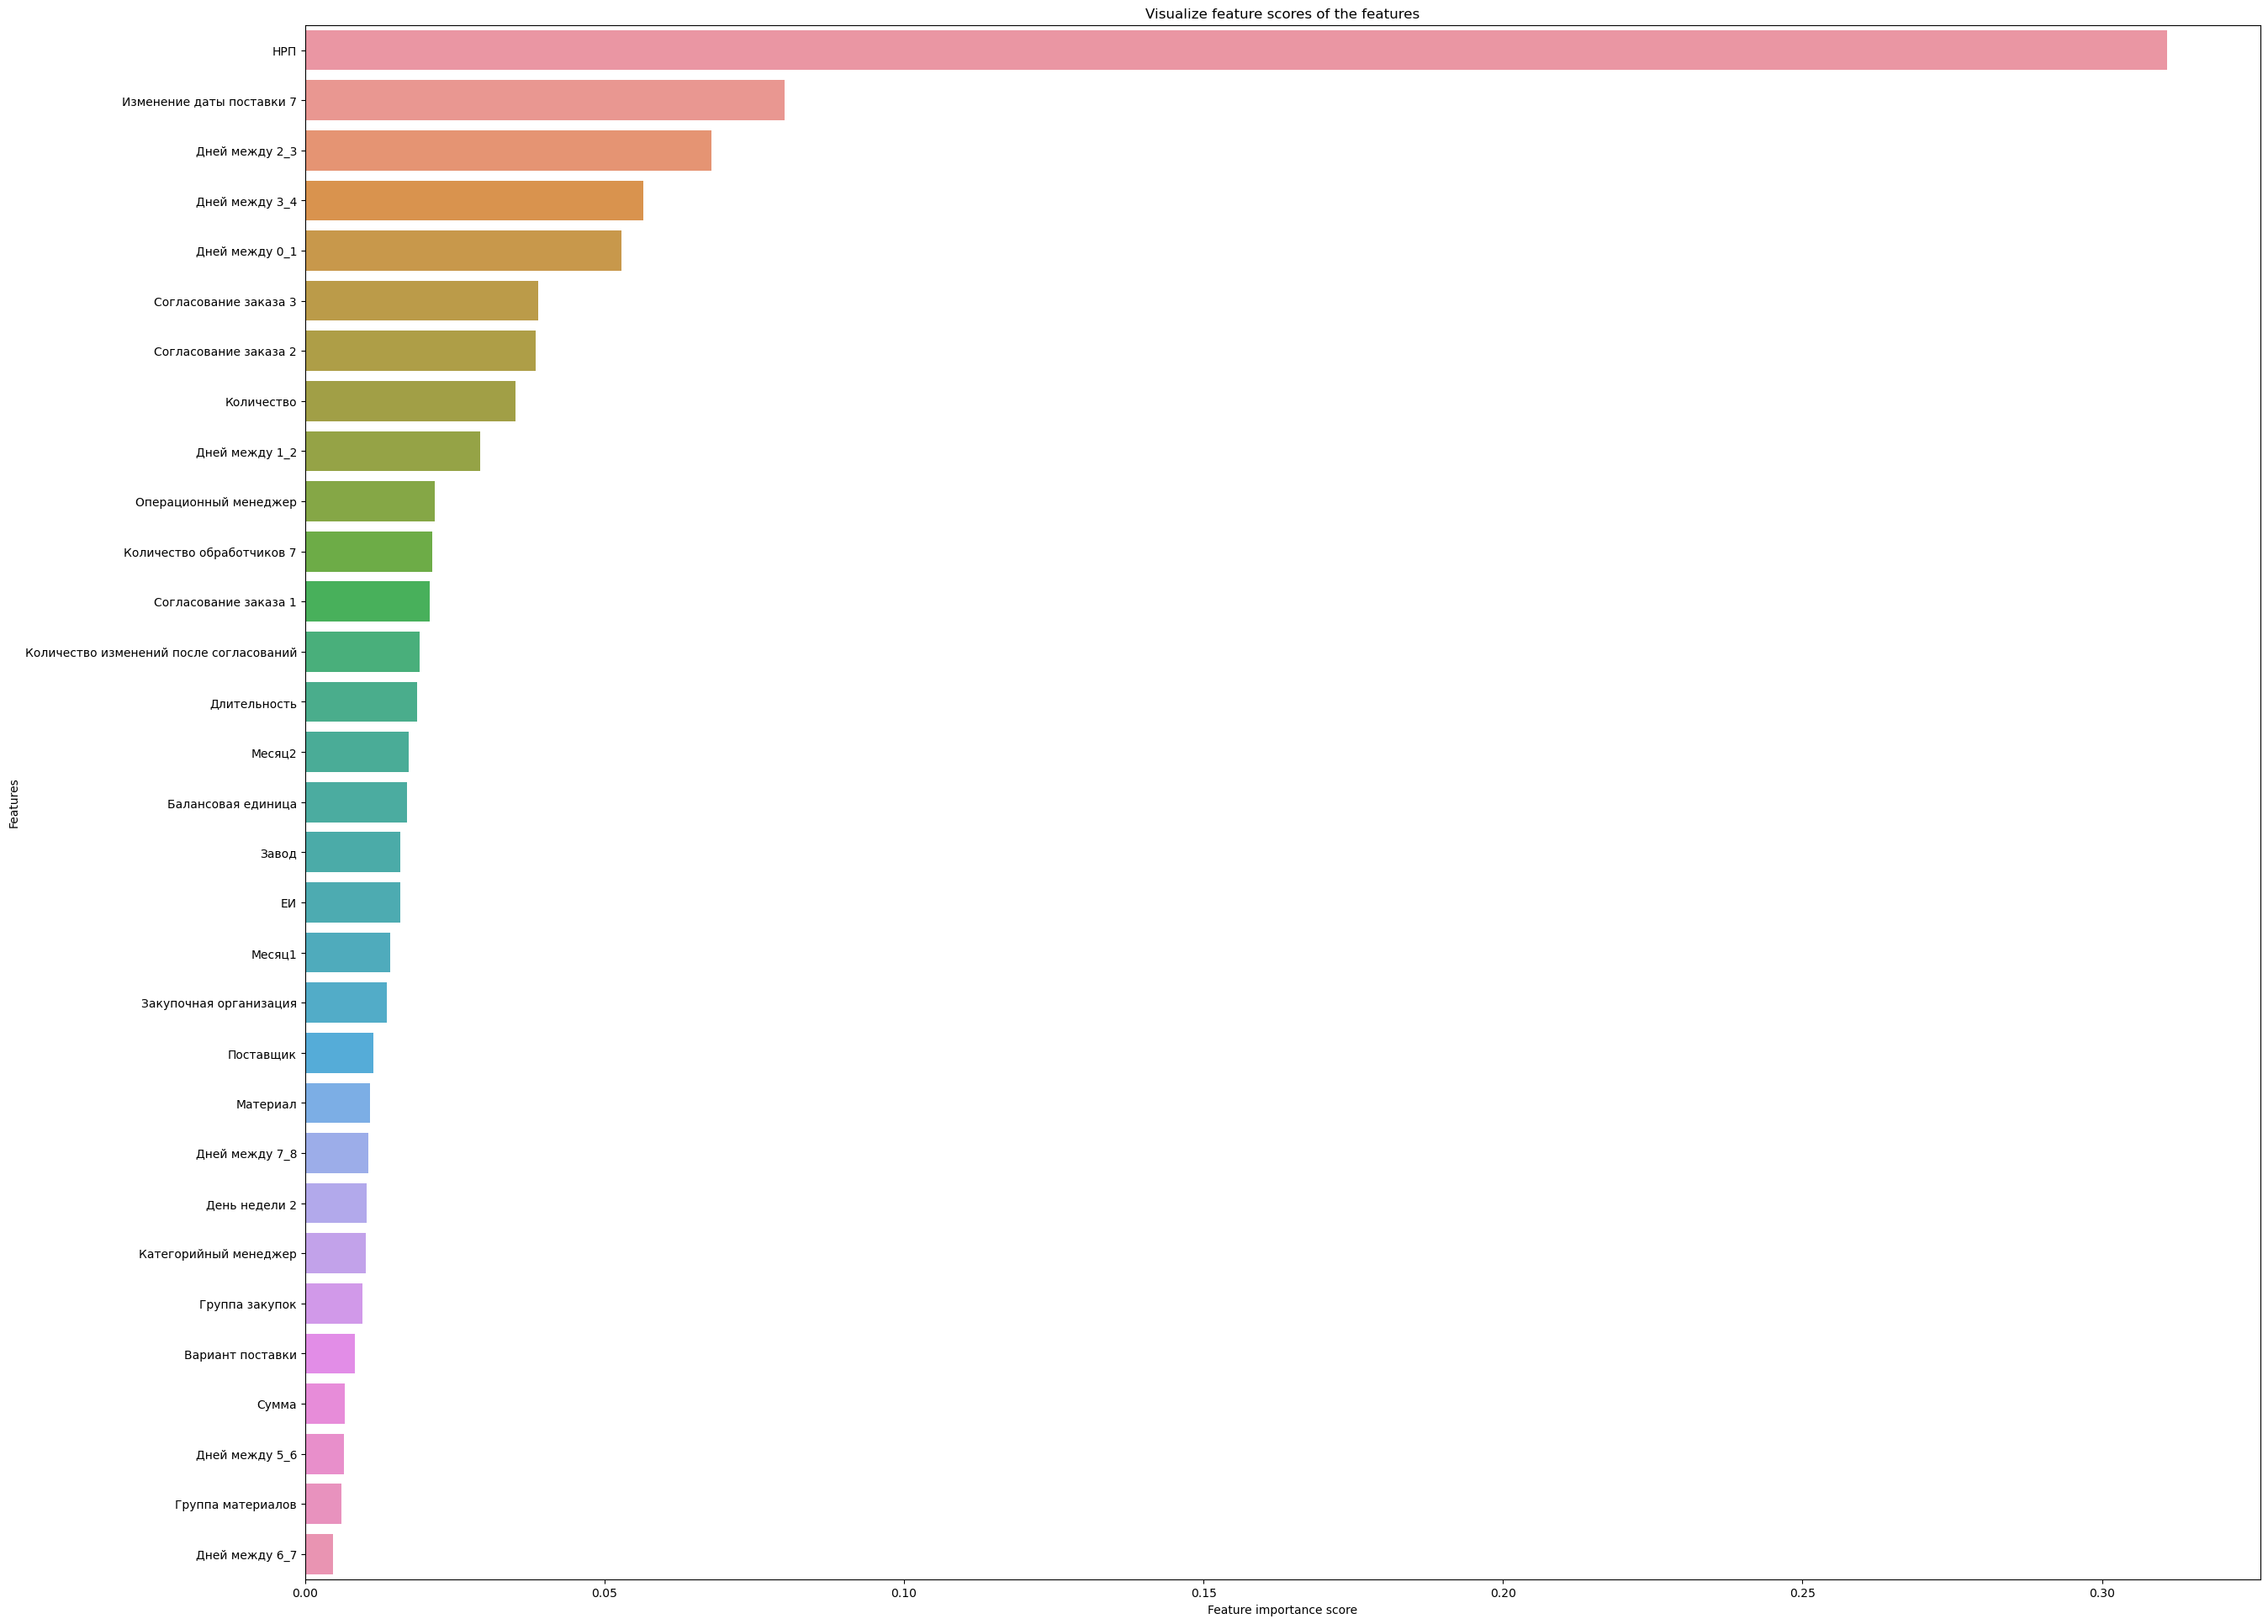

In [14]:
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [21]:
minimum_score = 0.01

In [22]:
feature_scores[feature_scores <= minimum_score].index.to_list()

['Группа закупок',
 'Вариант поставки',
 'Сумма',
 'Дней между 5_6',
 'Группа материалов',
 'Дней между 6_7']

In [23]:
# drop the least important feature from X_train and X_test

X_train = X_train.drop(feature_scores[feature_scores <= minimum_score].index.to_list(), axis=1)

X_test = X_test.drop(feature_scores[feature_scores <= minimum_score].index.to_list(), axis=1)

In [24]:
# instantiate the classifier with n_estimators = 100

clf = XGBClassifier(n_estimators=200, random_state=0)



# fit the model to the training set
clf.fit(X_train, y_train)

# Predict on the test set results

y_pred = clf.predict(X_test)
# 0.95635

In [25]:
print(f1_score(y_test, y_pred, average='macro'))

0.9377288014393266


In [80]:
test_data = pd.read_csv('cleared_test.csv')
X_test = test_data
X_test = X_test[X_train.columns]

In [81]:
X_test

,Поставщик,Материал,Категорийный менеджер,Операционный менеджер,Завод,Закупочная организация,Балансовая единица,ЕИ,НРП,Длительность,...,Согласование заказа 1,Согласование заказа 2,Согласование заказа 3,Изменение даты поставки 7,Количество изменений после согласований,Дней между 0_1,Дней между 1_2,Дней между 2_3,Дней между 3_4,Дней между 7_8
0,273,269,6,8,1,1,1,9,1.0,45,...,2,2,1,0.0,16,0.0,0.0,1.0,0.0,-1.0
1,499,27439,1,10,18,16,14,1,1.0,0,...,0,1,0,0.0,12,0.0,-1.0,-1.0,-1.0,-1.0
2,86,27439,2,2,1,1,1,1,0.0,28,...,1,1,1,3.0,12,3.0,0.0,0.0,0.0,-1.0
3,97,4064,2,4,7,1,6,3,0.0,43,...,1,1,1,2.0,16,7.0,0.0,0.0,0.0,1.0
4,117,27439,2,3,1,1,1,1,1.0,12,...,1,1,1,1.0,15,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,255,6409,3,6,3,1,3,1,0.0,155,...,2,2,2,0.0,18,0.0,0.0,0.0,0.0,-1.0
24996,1,5827,1,1,7,1,6,1,0.0,74,...,2,2,2,4.0,0,1.0,0.0,0.0,0.0,-1.0
24997,8,6504,6,5,3,1,3,1,1.0,5,...,1,1,1,0.0,9,2.0,0.0,0.0,0.0,-1.0
24998,18,1309,7,17,1,1,1,1,1.0,36,...,2,3,3,0.0,31,8.0,0.0,0.0,1.0,-1.0


In [82]:
y_pred = clf.predict(X_test)

In [83]:
submission_df = pd.DataFrame({'id': range(len(y_pred)), 'value': y_pred})
submission_df.to_csv('submission.csv', index=False)